# Create an algorithm that recommends movies you may like depending on movies ratings

## Import the libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

## Import the dataset containing movies' rating

The data set (u.data) contains:

#### user_id - showing the id of the person who made the review
#### item_id - showing the id of the movie
#### rating  - ranging from 1 to 5

While the data set 'Movie_Id_titles' contains:
#### item_id - showing the id of the movie
#### title  - the title of the movie

In [3]:
colums_names = ['user_id','item_id','rating','timestamp']

In [4]:
df = pd.read_csv('u.data',sep='\t',names=colums_names)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


This needs to be merged with 'Movie_Id_Titles' that maches each item_id with the corresponding title

In [6]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [7]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
df = pd.merge(df,movie_titles,on='item_id')

In [9]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


## Create a Data Frame that calculates the average score and the number of people who rated the movies

We want to know the average rating score for each movie and how many people reviewed it

In [11]:
# calcultate the mean score received for each movie
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [12]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
# calculate the number of rating per movie
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [14]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Text(0,0.5,'Number of movies votes by x amount of people')

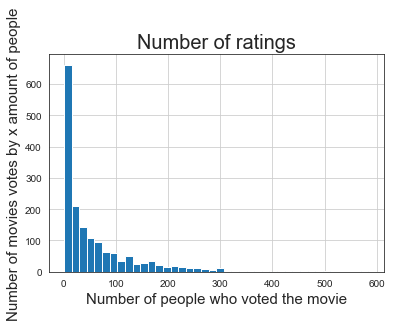

In [23]:
# plot an histogram showing the number of ratings
ratings['num of ratings'].hist(bins=40)
plt.title('Number of ratings',size=20)
plt.xlabel('Number of people who voted the movie',size=15)
plt.ylabel('Number of movies votes by x amount of people',size=15)

Text(0,0.5,'Number of movies')

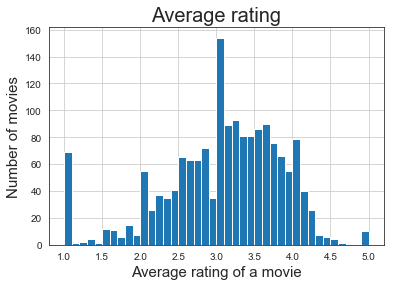

In [24]:
# plot an histogram showing the average rating
ratings['rating'].hist(bins=40)
plt.title('Average rating',size=20)
plt.xlabel('Average rating of a movie',size=15)
plt.ylabel('Number of movies',size=15)

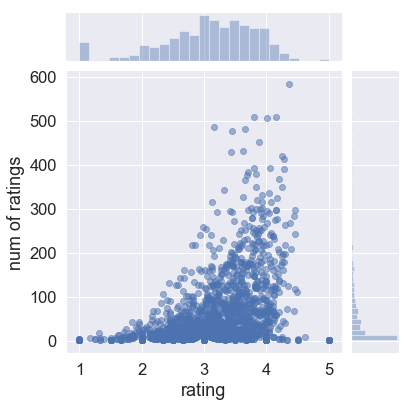

In [27]:
sns.set(font_scale=1.5)
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

## Create a DataFrame that shows each person what score gave to each movie

In [28]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [29]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Choose two movie to try out the recommendation system

In [30]:
# select the 10 movies with most ratings
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [31]:
# select who and what rating have 'Star Wars' and 'Toy Story' received 
starwars_user_ratings = moviemat['Star Wars (1977)']
toystory_user_ratings = moviemat['Toy Story (1995)']

In [32]:
# calculate the correlation between 'Star Wars' and the other movies
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

/Users/valentinapacifico/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/valentinapacifico/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [33]:
# calculate the correlation between 'Toy Story' and the other movies
similar_to_toystoy = moviemat.corrwith(toystory_user_ratings)

In [34]:
#create a DataFrame to show this correlation
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [35]:
# calculate the most correlated movies
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


There are many movies that show a correlation of 1 with Star Wars, this might be because they have only recieved a few ratings, to improve the accuracy we need to consider movies with higher number of ratings

In [36]:
# add to the data frame the number of ratings
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [37]:
corr_starwars[corr_starwars['num of ratings']>50].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Giant (1956),0.488093,51
"Life Less Ordinary, A (1997)",0.411638,53
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331


In [38]:
corr_toystory = pd.DataFrame(similar_to_toystoy,columns=['Correlation'])

In [39]:
corr_toystory.dropna(inplace=True)

In [40]:
corr_toystory = corr_toystory.join(ratings['num of ratings'])
corr_toystory.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93


In [41]:
corr_toystory[corr_toystory['num of ratings']>50].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Toy Story (1995),1.000000,452
Raise the Red Lantern (1991),0.641535,58
Flubber (1997),0.558389,53
"Jackal, The (1997)",0.557876,87
"Craft, The (1996)",0.549100,104
"Island of Dr. Moreau, The (1996)",0.490491,57
Notorious (1946),0.486031,52
Cyrano de Bergerac (1990),0.480052,66
"Beautician and the Beast, The (1997)",0.466064,86
